## Logistic Regression

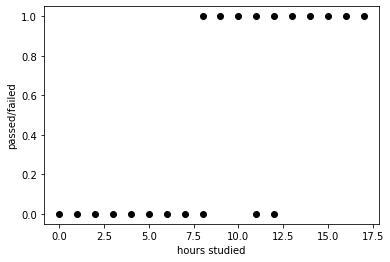

In [1]:
# import codecademylib3
import pandas as pd
import matplotlib.pyplot as plt
codecademyU = pd.read_csv('exam.csv')

# Scatter plot of exam passage vs number of hours studied
plt.scatter(x = 'hours_studied', y = 'passed_exam', data = codecademyU, color='black')
plt.ylabel('passed/failed')
plt.xlabel('hours studied')

plt.show()

## Linear Regression
線性方程式

$y = b_0 + b_1x_1 + b_2x_2 + ... + b_nx_n$

- y：我們要預測的值
- $b_0$：線性方程式的截距
- $b_1, b_2,...,b_n$：各個變數(特徵)的係數
- $x_1, x_2,...,x_n$：各個變數(特徵)

從我們的資料來看，`y`：1(及格) 或 0(不及格)，只有一個特徵$x_1$：讀書時數

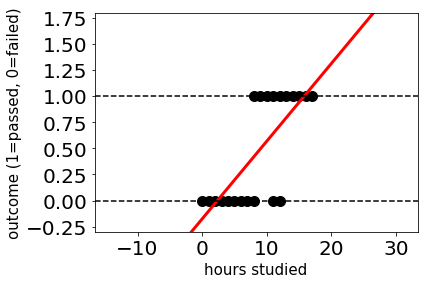

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
codecademyU = pd.read_csv('exam.csv')

# Define slacker, average, and studious below
slacker = -0.25
average = 0.5
studious = 1.75

# Fit a linear model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(codecademyU[['hours_studied']], codecademyU[['passed_exam']])

# Get predictions from the linear model
sample_x = np.linspace(-16.65, 33.35, 300).reshape(-1,1)
predictions = model.predict(sample_x)

# Plot the data
plt.scatter(x = 'hours_studied', y = 'passed_exam', data = codecademyU, color='black', s=100)

# Plot the line
plt.plot(sample_x, predictions, color='red', linewidth=3)

# Customization for readability
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.axhline(y=0, color='k', linestyle='--')
plt.axhline(y=1, color='k', linestyle='--')

# Label plot and set limits
plt.ylabel('outcome (1=passed, 0=failed)', fontsize = 15)
plt.xlabel('hours studied', fontsize = 15)
plt.xlim(-16.65, 33.35)
plt.ylim(-.3, 1.8)

# Show the plot
plt.tight_layout()
plt.show()

## Logic link function
從原本的
$$y= b_0 + b_1x_1 + b_2x_2 + ... + b_nx_n$$

改成
$$ln(\frac{y}{1-y}) = b_0 + b_1x_1 + b_2x_2 + ... + b_nx_n$$


## Log-Odds

我們將`y`改成用`p`表示，`p`視為機率，在此資料集為學生及格的機率

$$ln(\frac{p}{1-p}) = b_0 + b_1x_1 + b_2x_2 + ... + b_nx_n$$

某事件的**Odds**計算公式為
$$Odds = \frac{p}{1-p} = \frac{P\text{(event occurring)}}{P\text{(event not occurring)}}$$

假設一學生及格的機率為0.8，不及格的機率為0.2

及格的Odds = $\frac{0.8}{0.2} = 4$
 - 代表他及格的機率為不及格的4倍

因為$Odd > 0$

$log(Odd)： -\infty \text{~} \infty$

$log(Odd)$ 將只有0~1的機率值，傳換成$-\infty \text{~} \infty$表達

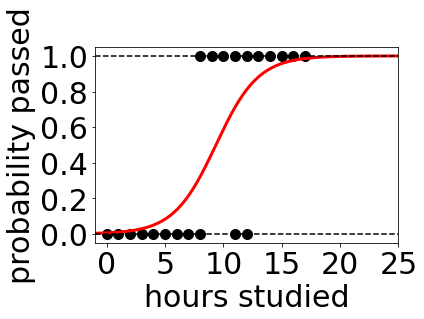

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
codecademyU = pd.read_csv('exam.csv')

# Define five_hour_studier below
five_hour_studier = 0.05

# Fit the logistic regression model
hours_studied = codecademyU[['hours_studied']]
passed_exam = np.array(codecademyU[['passed_exam']]).ravel()

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(hours_studied, passed_exam)


# Plug sample data into fitted model
sample_x = np.linspace(-16.65, 33.35, 300).reshape(-1,1)
probability = model.predict_proba(sample_x)[:,1]

# Plot exam data
plt.scatter(hours_studied, passed_exam, color='black', s=100)

# Plot logistic curve
plt.plot(sample_x, probability, color='red', linewidth=3)

# Customization for readability
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.axhline(y=0, color='k', linestyle='--')
plt.axhline(y=1, color='k', linestyle='--')

# Label plot and set limits
plt.ylabel('probability passed', fontsize = 30)
plt.xlabel('hours studied', fontsize = 30)
plt.xlim(-1, 25)
plt.tight_layout()

# Show the plot
plt.show()

In [4]:
import numpy as np
# Calculate odds_of_rain
odds_of_rain = .4/.6
print('odds of rain: ', odds_of_rain)

# Calculate log_odds_of_rain
log_odds_of_rain = np.log(.4/.6)
print('log odds of rain: ', log_odds_of_rain)

# Calculate odds_on_time
odds_on_time = .9/.1
print('odds of an on-time train: ', odds_on_time)

# Calculate log_odds_on_time
log_odds_on_time = np.log(.9/.1)
print('log odds of on-time train: ', log_odds_on_time)

odds_of_rain = 0.4 / (1-0.4)
print(odds_of_rain)

log_odds_of_rain = np.log(odds_of_rain)
print(log_odds_of_rain)

odds_on_time = 0.9 / (1 - 0.9)
print(odds_on_time)
log_odds_on_time = np.log(odds_on_time)
print(log_odds_on_time)

print(np.log(0.5/0.5))

odds of rain:  0.6666666666666667
log odds of rain:  -0.4054651081081643
odds of an on-time train:  9.0
log odds of on-time train:  2.1972245773362196
0.6666666666666667
-0.4054651081081643
9.000000000000002
2.1972245773362196
0.0


### 由log odds回推機率

$ln(\frac{p}{1-p}) = -3.5$

$\frac{p}{1-p} = e^{-3.5}$

$p = e^{-3.5}\times(1-p)$

$p \times(1 + e^{-3.5}) = e^{-3.5}$

$p = \frac{e^{-3.5}}{1+e^{-3.5}}$

$p = 0.029$

$$p = \frac{e^{\text{log_odds}}}{1+e^{\text{log_odds}}}$$

In [5]:
# Import libraries and data
import pandas as pd
import numpy as np
codecademyU = pd.read_csv('exam.csv')

# Fit the logistic regression model
hours_studied = codecademyU[['hours_studied']]
passed_exam = np.array(codecademyU[['passed_exam']]).ravel()
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(hours_studied,passed_exam)

# Save intercept and coef
intercept = model.intercept_
coef = model.coef_

# Calculate log_odds here
log_odds = intercept + coef * hours_studied
codecademyU['log_odds'] = log_odds

# Calculate pred_probability_passing here
pred_probability_passing = np.exp(log_odds) / (1 + np.exp(log_odds))

codecademyU['probability'] = pred_probability_passing
print(codecademyU)

    hours_studied  passed_exam  log_odds  probability
0               0            0 -5.162686     0.005694
1               1            0 -4.610932     0.009845
2               2            0 -4.059178     0.016970
3               3            0 -3.507424     0.029102
4               4            0 -2.955670     0.049469
5               5            0 -2.403915     0.082875
6               6            0 -1.852161     0.135619
7               7            0 -1.300407     0.214096
8               8            0 -0.748653     0.321115
9              11            0  0.906609     0.712306
10             12            0  1.458364     0.811282
11              8            1 -0.748653     0.321115
12              9            1 -0.196899     0.450934
13             10            1  0.354855     0.587794
14             11            1  0.906609     0.712306
15             12            1  1.458364     0.811282
16             13            1  2.010118     0.881855
17             14           

## sklit-learn

- sklearn **deafult threshold:**`0.5`

In [6]:
# Import pandas and the data
import pandas as pd
codecademyU = pd.read_csv('codecademyU_2.csv')

# Separate out X and y
X = codecademyU[['hours_studied', 'practice_test']]
y = codecademyU.passed_exam

# Transform X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 27)

# Create and fit the logistic regression model here:
from sklearn.linear_model import LogisticRegression
cc_lr = LogisticRegression()
cc_lr.fit(X_train, y_train)

# Print the intercept and coefficients here:
print(cc_lr.coef_)
print(cc_lr.intercept_)
print()
# Print out the predicted outcomes for the test data
print(cc_lr.predict(X_test))
# Print out the predicted probabilities for the test data
print(cc_lr.predict_proba(X_test))
# Print out the true outcomes for the test data
print(y_test)

[[1.5100409  0.12002228]]
[-0.13173123]

[0 1 0 1 1]
[[0.67934073 0.32065927]
 [0.2068119  0.7931881 ]
 [0.94452517 0.05547483]
 [0.42252072 0.57747928]
 [0.12929566 0.87070434]]
7     0
15    1
0     0
11    0
17    1
Name: passed_exam, dtype: int64


In [7]:
# Pick an alternative threshold here:

# Import pandas and the data
import pandas as pd
codecademyU = pd.read_csv('codecademyU_2.csv')

# Separate out X and y
X = codecademyU[['hours_studied', 'practice_test']]
y = codecademyU.passed_exam

# Transform X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 27)

# Create and fit the logistic regression model here:
from sklearn.linear_model import LogisticRegression
cc_lr = LogisticRegression()
cc_lr.fit(X_train,y_train)
y_pred = cc_lr.predict(X_test)
y_prob = cc_lr.predict_proba(X_test)

print('True label:', list(y_test))
print('\nPredict probability:', y_prob[:,1])
print(f'default threshold:0.5')
print(y_pred)


alternative_threshold = 0.7
print(f'\nthreshold:{alternative_threshold}')
predict_new = (y_prob >= alternative_threshold).astype(int)
print(list(predict_new[:,1]))

True label: [0, 1, 0, 0, 1]

Predict probability: [0.32065927 0.7931881  0.05547483 0.57747928 0.87070434]
default threshold:0.5
[0 1 0 1 1]

threshold:0.7
[0, 1, 0, 0, 1]


## Confusion matrix

可以利用confusion matrix檢查預測情況

可以發現，本測試集有一筆資料預測為1但實際上label為0

<img src="https://github.com/MiaZhang17/MachineLearning/blob/main/piecures/confusion_matrix.png?raw=true" style="width:200px;"/>

- **Accuracy：**所有資料中，預測正確的比例
$$Accuracy = \frac{TP + TN}{TP + FP + TN + FN}$$

- **Precision：**我說是True, 實際上是True的比例(說話可信度)
$$Precision = \frac{TP}{TP + FP}$$


- **Recall：**所有為True的資料中，實際預測正確的比例
 - 判斷是否為癌細胞：若有癌細胞卻沒預測出來，後果會很嚴重，寧可誤判(良性細胞預測為癌細胞)，也必須將所有癌細胞抓出來，此種情況會要求Recall高，可接受其餘稍低
$$Recall = \frac{TP}{TP + FN}$$

- **F1 score：**Precision 與 Recall的平均 
$$\text{F1 score} = Avg(Precision, Recall)$$


True value：   [0, 1, 0, 0, 1]
Predict value：[0, 1, 0, 1, 1]
[[2 1]
 [0 2]]


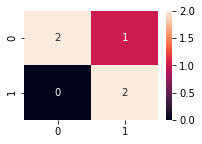

In [8]:
# Print out the confusion matrix here
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

confusion_mx = confusion_matrix(y_test, y_pred)
print(f'True value：   {list(y_test)}')
print(f'Predict value：{list(y_pred)}')
print(confusion_mx)

plt.figure(figsize = (3,2))
sn.heatmap(confusion_mx, annot=True)
plt.show()

In [9]:
# Print accuracy here:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

# Print F1 score here:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred))


0.8
0.8
